### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import GRU, Dense, Input, Dropout
from scikeras.wrappers import KerasRegressor
import tensorflow as tf

### Import Dataset and View Columns

In [2]:
df = pd.read_csv('dseats_2024_training_dataset.csv')
pd.DataFrame(columns=['Columns'], data=df.columns)

,Columns
0,PRODUCTION DATE
1,Field Name
2,WELL_BORE_CODE
3,N_WELL_BORE_CODE
4,WellBore Name
5,FLOW_KIND
6,WELL_TYPE
7,Downhole Pressure (PSI)
8,Downhole Temperature (Kelvin)
9,Average Tubing Pressure


### Dataset Shape

In [3]:
df.shape

(6925, 16)

### Datatype of each Column

In [4]:
df.dtypes

PRODUCTION DATE                   object
Field Name                        object
WELL_BORE_CODE                    object
N_WELL_BORE_CODE                   int64
WellBore Name                     object
FLOW_KIND                         object
WELL_TYPE                         object
Downhole Pressure (PSI)          float64
Downhole Temperature (Kelvin)    float64
Average Tubing Pressure          float64
Annulus Pressure (PSI)           float64
AVG WHP (PSI)                    float64
Choke Size                       float64
Oil Production (stb/day)         float64
Gas Volume (scf/day)             float64
Water Production (stb/day)       float64
dtype: object

### Set Index and Rename Columns to Standard Format

In [5]:
def edit_columns(df):
    df['PRODUCTION DATE'] = pd.to_datetime(df['PRODUCTION DATE'], format='%d/%m/%Y %H:%M', dayfirst=True)
    df = df.rename(columns={
        'PRODUCTION DATE':'Production_Date',
        'Field Name':'Field_Name',
        'WELL_BORE_CODE':'Well_Bore_Code',
        'N_WELL_BORE_CODE':'N_Well_Bore_Code',
        'WellBore Name': 'Well_Bore_Name',
        'FLOW_KIND':'Flow_Kind',
        'WELL_TYPE':'Well_Type',
        'Downhole Pressure (PSI)':'Downhole_Pressure_(PSI)',
        'Downhole Temperature (Kelvin)':'Downhole_Temperature_(Kelvin)',
        'Average Tubing Pressure':'Average_Tubing_Pressure',
        'Annulus Pressure (PSI)':'Annulus_Pressure_(PSI)',
        'AVG WHP (PSI)':'AVG_WHP_(PSI)',
        'Choke Size':'Choke_Size',
        'Oil Production (stb/day)':'Oil_Production_(stb/day)',
        'Gas Volume (scf/day)':'Gas_Volume_(scf/day)',
        'Water Production (stb/day)':'Water_Production_(stb/day)'
    })
    df = df.set_index('Production_Date')
    return df
df = edit_columns(df)
df.head()

,Field_Name,Well_Bore_Code,N_Well_Bore_Code,Well_Bore_Name,Flow_Kind,Well_Type,Downhole_Pressure_(PSI),Downhole_Temperature_(Kelvin),Average_Tubing_Pressure,Annulus_Pressure_(PSI),AVG_WHP_(PSI),Choke_Size,Oil_Production_(stb/day),Gas_Volume_(scf/day),Water_Production_(stb/day)
Production_Date,,,,,,,,,,,,,,,
2014-04-07,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
2014-04-08,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
2014-04-09,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
2014-04-10,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,0.00000,273.15000,0.00000,0.0,0.00000,0.00000,0.0,0.0,0.0
2014-04-11,DSEAT,DSEAT-001-F-1 C,105,001-F-1 C,production,OP,4500.45403,370.02589,4020.53477,0.0,479.91926,33.07195,0.0,0.0,0.0


### Check for Missing Values

In [6]:
df.isnull().sum()

Field_Name                       0
Well_Bore_Code                   0
N_Well_Bore_Code                 0
Well_Bore_Name                   0
Flow_Kind                        0
Well_Type                        0
Downhole_Pressure_(PSI)          0
Downhole_Temperature_(Kelvin)    0
Average_Tubing_Pressure          0
Annulus_Pressure_(PSI)           0
AVG_WHP_(PSI)                    0
Choke_Size                       6
Oil_Production_(stb/day)         0
Gas_Volume_(scf/day)             0
Water_Production_(stb/day)       0
dtype: int64

### Fill Missing Values

In [7]:
df['Choke_Size'] = df['Choke_Size'].fillna(method='pad')
df.isnull().sum()

Field_Name                       0
Well_Bore_Code                   0
N_Well_Bore_Code                 0
Well_Bore_Name                   0
Flow_Kind                        0
Well_Type                        0
Downhole_Pressure_(PSI)          0
Downhole_Temperature_(Kelvin)    0
Average_Tubing_Pressure          0
Annulus_Pressure_(PSI)           0
AVG_WHP_(PSI)                    0
Choke_Size                       0
Oil_Production_(stb/day)         0
Gas_Volume_(scf/day)             0
Water_Production_(stb/day)       0
dtype: int64

### Check for Categorical Columns

In [8]:
df.nunique()

Field_Name                          1
Well_Bore_Code                      5
N_Well_Bore_Code                    5
Well_Bore_Name                      5
Flow_Kind                           1
Well_Type                           2
Downhole_Pressure_(PSI)          5050
Downhole_Temperature_(Kelvin)    4983
Average_Tubing_Pressure          6710
Annulus_Pressure_(PSI)           4800
AVG_WHP_(PSI)                    6713
Choke_Size                       6856
Oil_Production_(stb/day)         6144
Gas_Volume_(scf/day)             6240
Water_Production_(stb/day)       5643
dtype: int64

### Check if there is a Unique Set of Values for N Well Bore Code and Well Bore Name for every Well Bore Code

In [9]:
Well_Bore_Code = [code for code in df['Well_Bore_Code'].unique().tolist()]
N_Well_Bore_Code = [code for code in df['N_Well_Bore_Code'].unique().tolist()]
Well_Bore_Name = [name for name in df['Well_Bore_Name'].unique().tolist()]

bool_array = list()
for dt in df.to_numpy():
    ix = Well_Bore_Code.index(dt[1])
    if dt[2] != N_Well_Bore_Code[ix] and dt[3] != Well_Bore_Name[ix]:
        bool_array.append(True)
    else:
        bool_array.append(False)

print(len(df[bool_array]))

0


### Drop Categorical Columns of Single Values and those that are consistent with Well Bore Code

In [10]:
df = df.drop(['Field_Name', 'Flow_Kind', 'N_Well_Bore_Code', 'Well_Bore_Name'], axis=1)

encoder = LabelEncoder()
df['Well_Bore_Code'] = encoder.fit_transform(df['Well_Bore_Code'])

### Check for Unique Values of Well Type

In [11]:
df['Well_Type'].value_counts()

Well_Type
OP    6924
WI       1
Name: count, dtype: int64

### Drop the only row with 'WI'

In [12]:
df = df[df['Well_Type'] != 'WI']
df = df.drop(['Well_Type'], axis=1)

### Get Information about the DataFrame

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6924 entries, 2014-04-07 to 2015-06-30
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Well_Bore_Code                 6924 non-null   int32  
 1   Downhole_Pressure_(PSI)        6924 non-null   float64
 2   Downhole_Temperature_(Kelvin)  6924 non-null   float64
 3   Average_Tubing_Pressure        6924 non-null   float64
 4   Annulus_Pressure_(PSI)         6924 non-null   float64
 5   AVG_WHP_(PSI)                  6924 non-null   float64
 6   Choke_Size                     6924 non-null   float64
 7   Oil_Production_(stb/day)       6924 non-null   float64
 8   Gas_Volume_(scf/day)           6924 non-null   float64
 9   Water_Production_(stb/day)     6924 non-null   float64
dtypes: float64(9), int32(1)
memory usage: 568.0 KB


### Get Statistical Information about the DataFrame

In [14]:
df.drop(['Well_Bore_Code'], axis=1).describe()

,Downhole_Pressure_(PSI),Downhole_Temperature_(Kelvin),Average_Tubing_Pressure,Annulus_Pressure_(PSI),AVG_WHP_(PSI),Choke_Size,Oil_Production_(stb/day),Gas_Volume_(scf/day),Water_Production_(stb/day)
count,6924.000000,6924.000000,6924.000000,6924.000000,6924.000000,6924.000000,6924.000000,6.924000e+03,6924.000000
mean,2587.406229,349.670229,2161.958482,180.395432,716.570088,21.866341,8495.527181,6.979301e+06,11482.077066
std,1588.575932,46.242602,1053.948589,139.764796,347.884616,22.315714,8928.021757,7.101206e+06,11484.615835
min,0.000000,273.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,-2879.813600
25%,0.000000,273.150000,896.609974,0.000000,476.527905,4.629052,1686.380450,1.434250e+06,80.291850
50%,3378.494104,376.907857,2472.135184,213.097184,619.578035,14.294923,5479.470600,4.771581e+06,5531.300200
75%,3664.917308,379.495989,2907.148293,300.357314,903.913022,31.533756,11731.022975,9.894465e+06,22263.486450
max,4606.666675,381.652178,4592.612695,435.287508,1991.009935,125.718570,37122.573600,3.004494e+07,50444.164600


### Change Negative Values of Water Production to 0

In [15]:
df['Water_Production_(stb/day)'] = df['Water_Production_(stb/day)'].where(df['Water_Production_(stb/day)'] >= 0, 0)

### View Correlations Between the Columns

<Axes: >

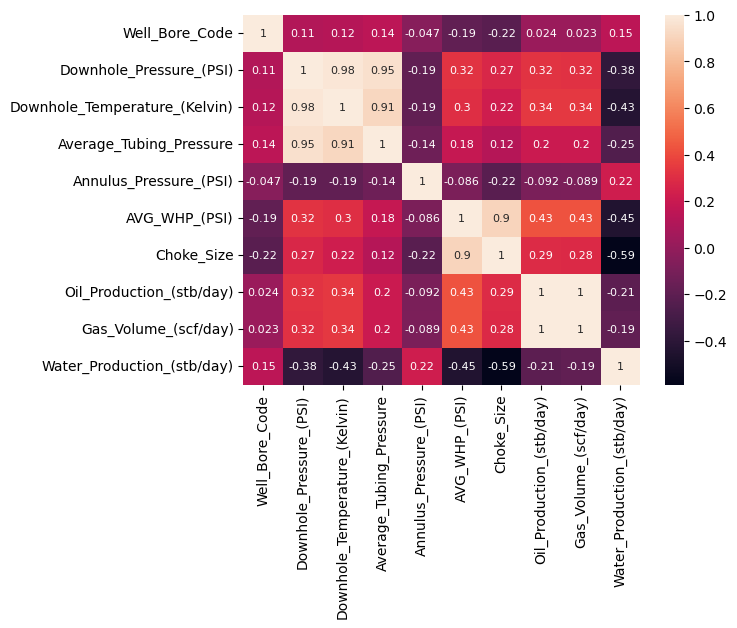

In [16]:
correlation = df.corr()
sns.heatmap(correlation, xticklabels=correlation.columns, 
            yticklabels=correlation.columns, annot=True, annot_kws={"size": 8})

### Plot of Oil Production, Gas Production and Water Production

array([<Axes: xlabel='Production_Date'>, <Axes: xlabel='Production_Date'>,
       <Axes: xlabel='Production_Date'>], dtype=object)

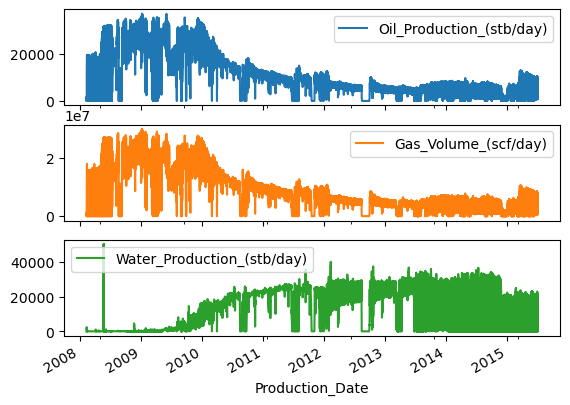

In [17]:
df[['Oil_Production_(stb/day)', 'Gas_Volume_(scf/day)', 'Water_Production_(stb/day)']].plot(subplots=True)

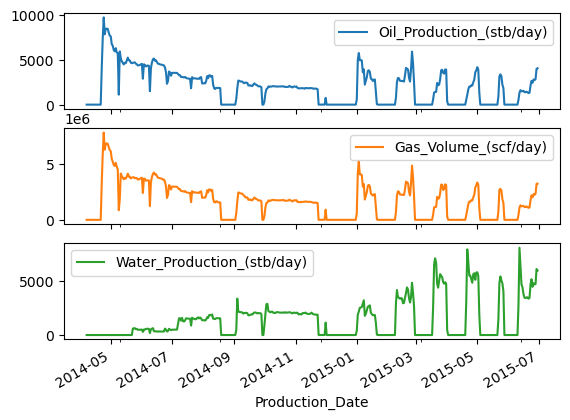

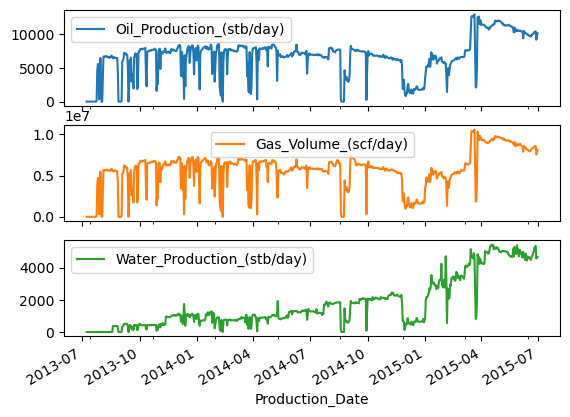

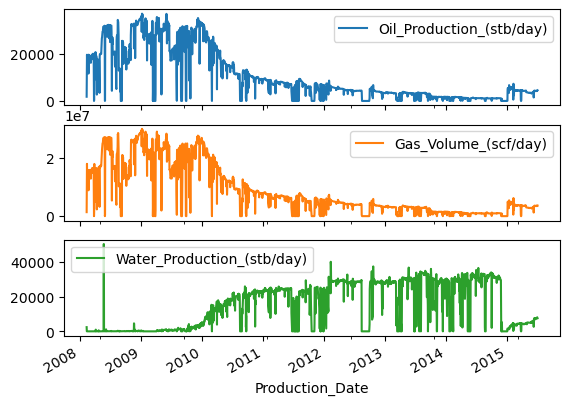

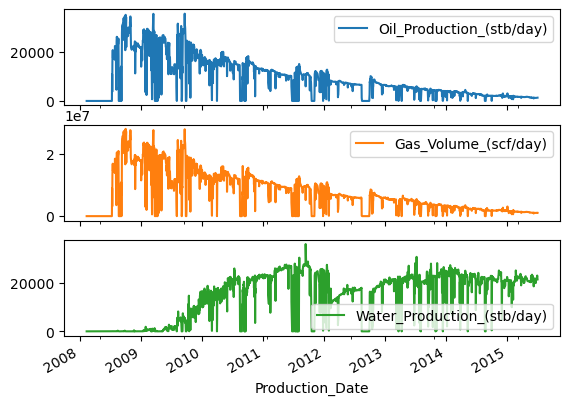

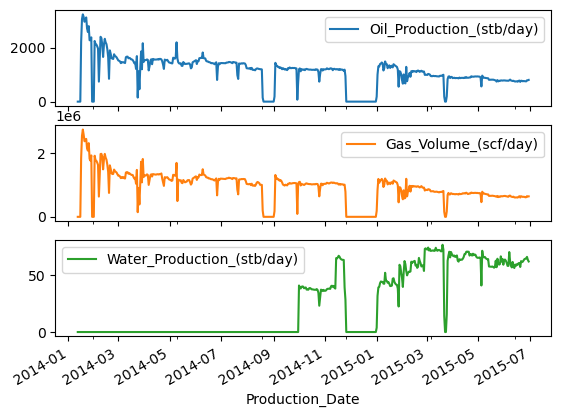

In [18]:
for code in df['Well_Bore_Code'].unique():
    df[df['Well_Bore_Code'] == code][['Oil_Production_(stb/day)', 'Gas_Volume_(scf/day)', 'Water_Production_(stb/day)']].plot(subplots=True, label=code)

### Splitting Dataset to Test and Train Datasets and Scaling

In [19]:
#80% for training and 20% for testing

scaler = MinMaxScaler()
s_df = scaler.fit_transform(df)
train_dataset = s_df[0:round(len(s_df)*0.8)]
test_dataset = s_df[round(len(s_df)*0.8): len(s_df)]

### Convert Data to Time-Series

In [20]:
def get_time_series(dataset):
    features = dataset[:, 0:10].tolist()
    target = dataset[:, 7:10].tolist()
    return TimeseriesGenerator(features, target, length=10, batch_size=1)

ts_generator_train = get_time_series(train_dataset)
ts_generator_test = get_time_series(test_dataset)

### Get Feature and Target Columns from Time-Series Data

In [21]:
def get_features_targets(time_series):   
    x = list()
    y = list()
    for i in range(len(time_series)):
        x.append(time_series[i][0])
        y.append(time_series[i][1])
        
    return [np.array(x).reshape(-1, 10, 10), np.array(y).reshape(-1, 3)]
[x_test, y_test] = get_features_targets(ts_generator_test)
[x_train, y_train] = get_features_targets(ts_generator_train)

### Hyperparameter Tuning using GridSearchCV

In [22]:
#Tuning of each parameter was done separately due computation time and crashing of jupyter

# def build_model(units1, units2):
#     model = Sequential()
#     model.add(Input(shape=(10, 10)))
#     model.add(GRU(units1,activation='tanh'))
#     model.add(GRU(units2,activation='relu'))
#     model.add(Dropout(0.3))
#     model.add(Dense(3))
#     model.compile(optimizer='adam', loss='mean_squared_error')
#     return model
# grid_model = KerasRegressor(build_fn=build_model,verbose=1)
# parameters = {
#               'model__units1': [50, 100],
#               'model__units2': [50, 100],
#               'model__dropout': [0.2, 0.3, 0.4],
#               'batch_size' : [20, 16],
#               'model__activation1': ['tanh', 'relu'],
#               'model__activation2': ['tanh', 'relu'],
#               'model__optimizer' : ['adam', 'adadelta']       
#              }
# grid_search  = GridSearchCV(estimator = grid_model,
#                             param_grid=parameters,
#                            cv = 2, scoring='neg_mean_absolute_error')
# grid_search.fit(x_train, y_train, epochs=50)
# print(grid_search.best_params_)
# print(grid_search.best_score_)

### Model Training

In [23]:
# model parameters are selected based on hyperparameters tuning

tf.keras.utils.set_random_seed(42)

tf.config.experimental.enable_op_determinism()

model = Sequential()
model.add(Input(shape=(10, 10)))
model.add(GRU(100, activation='tanh', return_sequences=True))
model.add(GRU(100, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(3))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
model.fit(x_train, y_train, verbose=2, epochs=100, batch_size=20)
model.predict(x_test)
y_pred = model.predict(x_test)

Epoch 1/100
277/277 - 6s - 23ms/step - loss: 0.0126 - mae: 0.0730
Epoch 2/100
277/277 - 3s - 10ms/step - loss: 0.0082 - mae: 0.0556
Epoch 3/100
277/277 - 3s - 10ms/step - loss: 0.0076 - mae: 0.0525
Epoch 4/100
277/277 - 3s - 10ms/step - loss: 0.0075 - mae: 0.0516
Epoch 5/100
277/277 - 3s - 10ms/step - loss: 0.0073 - mae: 0.0501
Epoch 6/100
277/277 - 3s - 10ms/step - loss: 0.0069 - mae: 0.0485
Epoch 7/100
277/277 - 3s - 10ms/step - loss: 0.0069 - mae: 0.0480
Epoch 8/100
277/277 - 3s - 10ms/step - loss: 0.0067 - mae: 0.0469
Epoch 9/100
277/277 - 3s - 10ms/step - loss: 0.0067 - mae: 0.0467
Epoch 10/100
277/277 - 3s - 10ms/step - loss: 0.0065 - mae: 0.0459
Epoch 11/100
277/277 - 3s - 10ms/step - loss: 0.0065 - mae: 0.0458
Epoch 12/100
277/277 - 3s - 10ms/step - loss: 0.0065 - mae: 0.0455
Epoch 13/100
277/277 - 3s - 10ms/step - loss: 0.0064 - mae: 0.0448
Epoch 14/100
277/277 - 3s - 10ms/step - loss: 0.0063 - mae: 0.0445
Epoch 15/100
277/277 - 3s - 10ms/step - loss: 0.0064 - mae: 0.0446
Epoc

### Model Performance Metrics

In [24]:
mse, mae = model.evaluate(x_test, y_test, verbose=1)
print('MSE: %.3f, RMSE: %.3f, MAE: %.3f' % (mse, np.sqrt(mse), mae))

43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0036 - mae: 0.0308
MSE: 0.002, RMSE: 0.048, MAE: 0.023


### Inverse Scaling of Predicted and Test Target Columns

In [25]:
def inverse_scaling(scaled):
    scaled_repeat = np.append(scaled[:, 0:3], scaled[:, 0:3], axis=1)
    scaled_repeat = np.append(scaled_repeat, scaled[:, 0:1], axis=1)
    scaled_repeat = np.append(scaled_repeat, scaled[:, 0:3], axis=1)
    
    return scaler.inverse_transform(scaled_repeat)[:, 7:10]
                                    
y_pred = inverse_scaling(y_pred)
y_test = inverse_scaling(y_test)

### Graphical Comparison of Predicted and Actual Target Values

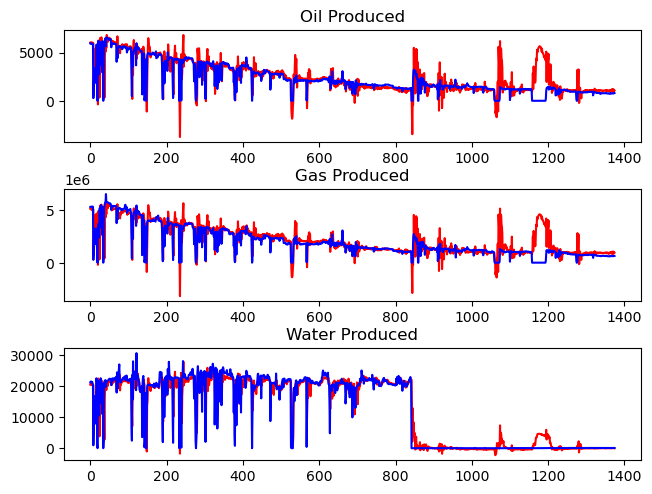

In [26]:
fig, axes = plt.subplots(3, 1)
labels = ['Oil Produced', 'Gas Produced', 'Water Produced']
for i in range(0,3):
    axes[i].plot(y_pred[:, i], color='red')
    axes[i].plot(y_test[:, i], color='blue')
    axes[i].set_title(labels[i])
fig.tight_layout(pad=0.2)

### Preprocessing of Dataset for Validation

In [27]:
val_df_past_10 = df.iloc[-10:,:]
val_df_future = pd.read_csv('dseats_2024_validation_dataset.csv', parse_dates=['PRODUCTION DATE'])
val_df_future = val_df_future.drop(index=val_df_future.index[2075:])
val_df_future = edit_columns(val_df_future)
date_index = val_df_future.index[:2075]
val_df_future = val_df_future.drop(['Field_Name', 'Flow_Kind', 'N_Well_Bore_Code', 'Well_Bore_Name', 'Well_Type'], axis=1)
val_df_future['Well_Bore_Code'] = encoder.transform(val_df_future['Well_Bore_Code'])

val_df_past_10 = pd.DataFrame(scaler.transform(val_df_past_10))
val_df_future = pd.DataFrame(scaler.transform(val_df_future))

full_val_df=pd.concat([val_df_past_10, val_df_future]).reset_index().drop(["index"],axis=1)

### Forecasting of Oil Production, Gas Production and Water Production using the Trained Model

In [28]:
predicted_data = []
time_step = 10
for i in range(time_step, len(full_val_df)):
    data_x=[]
    data_x.append(full_val_df.iloc[i-time_step :i , :])
    data_x=np.array(data_x)
    prediction=model.predict(data_x)
    predicted_data.append(prediction)
    full_val_df.iloc[i:i+1,7:10] = prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━

### Convert Predicted Data to Dataframe

In [29]:
predicted_df = pd.DataFrame(inverse_scaling(np.array(predicted_data).reshape(-1, 3)),\
                            columns=['Oil_Production_(stb/day)', 'Gas_Volume_(scf/day)', 'Water_Production_(stb/day)'])
predicted_df.head(10)

,Oil_Production_(stb/day),Gas_Volume_(scf/day),Water_Production_(stb/day)
0,1043.927002,9.295752e+05,-6.693680
1,2166.039551,1.807791e+06,-825.648376
2,2829.202881,2.396954e+06,1145.968628
3,3585.277100,3.062184e+06,1971.679321
4,4117.937988,3.488103e+06,1341.950195
5,5119.119141,4.307540e+06,704.487122
6,6004.704590,5.034660e+06,-80.216675
7,6273.927734,5.264662e+06,-287.295319
8,6503.043457,5.467124e+06,366.181519
9,6586.982910,5.538039e+06,687.966003


### Visualization of Predicted Data

array([<Axes: >, <Axes: >, <Axes: >], dtype=object)

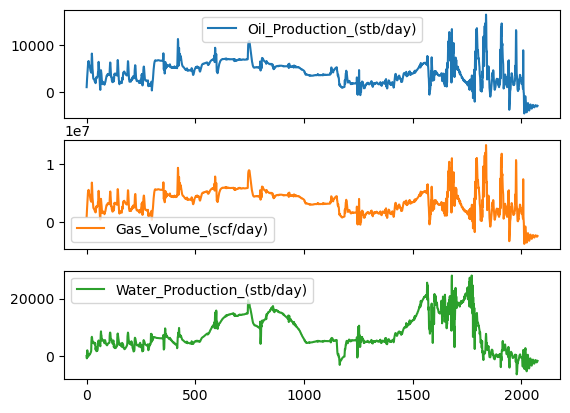

In [30]:
predicted_df.plot(subplots=True)

In [32]:
predicted_df['Production_Date'] = date_index
predicted_df.set_index('Production_Date', inplace=True)
predicted_df.to_csv('Oluwatimileyin_Ogunsola_2024_DSEATS_Datathon_5506607.csv', index_label='Production_Date')

In [34]:
predicted_df.head(10)

,Oil_Production_(stb/day),Gas_Volume_(scf/day),Water_Production_(stb/day)
Production_Date,,,
2015-07-01,1043.927002,9.295752e+05,-6.693680
2015-07-02,2166.039551,1.807791e+06,-825.648376
2015-07-03,2829.202881,2.396954e+06,1145.968628
2015-07-04,3585.277100,3.062184e+06,1971.679321
2015-07-05,4117.937988,3.488103e+06,1341.950195
2015-07-06,5119.119141,4.307540e+06,704.487122
2015-07-07,6004.704590,5.034660e+06,-80.216675
2015-07-08,6273.927734,5.264662e+06,-287.295319
2015-07-09,6503.043457,5.467124e+06,366.181519
